# 05. Factorization Machines
- 추천 시스템의 궁극적인 목표는 각 사용자의 각 아이템에 대한 선호도 혹은 구매확률을 예측하는 것
- FM은 사용자와 아이템의 다양한 특성을 모델링하는 것으로, 예측의 성능을 높이려는 방식
- **MF는 사용자의 취향과 아이템의 특성을 나타내는 특성값을 (feature) $K$개로 요약해서 추출하고, 이를 이용해 각 사용자의 각 아이템의 선호도를 예측하는 방식**
    
    **하지만 사용자의 취향과 아이템의 특성뿐 아니라 예측에 도움을 줄 수 있는 다른 변수가 존재할 수 있음 (나이, 성별, 지역 등)**
    
    **아이템의 경우, 각 영화의 특성을 나타내는 출연배우, 장르 등의 변수를 반영하면 선호도 예측이 증가할 수 있음**
    
    **또한, 영화의 관람이나 제품의 구매 시점의 상황을 나타내는 시간대, 요일 등의 변수까지 추가하면 정확도가 증가할 수 있음**

<br>

## 05.01 FM
- **FM의 기본 아이디어는 모든 변수와 그 변수들 간의 상호작용을 고려해서 평점을 예측하는 것**
- 만약, 어떤 영화에 대한 사용자의 평가에 영향을 미치는 요인이 사용자의 나이와 영화의 상영시간이라고 할 때,

    변수는 사용자 ID와 영화 ID, 사용자의 나이, 영화의 상영시간 총 4개
    
    각 변수의 상호작용으로는 사용자ID X 상영시간, 영화ID X 나이, 상영시간 X 나이 가 존재
    
    $\rightarrow$ **모든 변수가 영화에 미치는 영향을 학습하고 이를 바탕으로 평점을 예측하는 모델이 FM**
    
    $$\hat{y}(x) = w_{0} + \sum^n_{i=1}w_i x_i + \sum^n_{i=1} \sum^n_{j=i+1} x_i x_j \sum^k_{f=1}v_{i,f} v_{j,f} $$
    
    - $\hat{y}$ : 예측값
    - $x$ 입력변수
    - $w_0$ : Global Bias (전체 편향, 전체 평균)
    - $w_i$ : 입력변수 $x$의 편향
    - $v_i$ : 잠재요인행렬 (Latent Matrix, $v$에서 변수 $x_i$의 특성값)
    - $n$ :  입력변수의 수
    - $k$ : 잠재요인의 수

- 변수 $x$의 모든 가능한 2개씩의 조합에 대해서 해당 $x$의 잠재요인행렬 $v$의 값을 내적하고, 여기에 $x$의 값을 곱하는 것
- $v$는 MF의 $P$ 혹은 $Q$행렬 처럼 각 변수를 $k$개의 특성값으로 표현하는 잠재요인행렬,
    
    즉, 변수가 $n$개이고 특성값이 $k$개이므로, $n \times k$ 행렬
    

- $x$는 MF처럼 각 사용자나 아이템을 나타내는 것일 수도 있고, 장르나 시간과 같이 별도의 변수일 수도 있음
- 어떤 경우든 하나의 변수인 $x_i$에 대해서 하나의 편향값 ($w_i$)과 $k$개의 특성값을 가지게 됨
- **만일 $x$가 각 사용자와 아이템 각각을 나타내는 One-hot Encoding이고 사용자와 아이템 외에 다른 변수가 사용되지 않는다면, FM은 MF와 동일**

    $\rightarrow$ **즉 FM은 MF에 다른 변수를 추가할 수 있도록 일반화한 모형**

<br>

## 05.02. FM의 변형
-  $x$의 모든 가능한 두 개의 조합으로 구성되어 있기에, 변수가 늘어날수록 계산의 복잡도가 기하급수적으로 증가
    - 변수의 수$n$에 대한 복잡도를 나타내는 함수 $O(kn^2)$
    
- 식의 단순화를 위하여, $\sum^n_{i=1} \sum^n_{j=i+1} x_i x_j \sum^k_{f=1}v_{i,f} v_{j,f}$를 아래와 같이 변형

    $$\sum^n_{i=1} \sum^n_{j=i+1} x_i x_j \sum^k_{f=1}v_{i,f} v_{j,f}$$
    
    $$= \frac{1}{2}\sum^n_{i=1} \sum^n_{j=1} x_i x_j \sum^k_{f=1}v_{i,f} v_{j,f} - \frac{1}{2}\sum^n_{i=1} x_i x_j\sum^k_{f=1} v_{i,f} v_{j,f}$$
    
    $$= \frac{1}{2} (\sum^n_{i=1} \sum^n_{j=1} \sum^k_{f=1} x_i x_j v_{i,f} v_{j,f} - \sum^n_{i=1} \sum^k_{f=1}x_i x_j v_{i,f} v_{j,f} )$$
    
    $$= \frac{1}{2} \sum^k_{f=1} ((\sum^n_{i=1} v_{i,f} x_i) (\sum^n_{j=1} v_{j,f} x_{j}) -\sum^n_{i=1} v^2_{i, f} x^2_i)$$
    
    $$= \frac{1}{2} \sum^k_{f=1} ((\sum^n_{i=1} v_{i,f} x_i)^2  -\sum^n_{i=1} v^2_{i, f} x^2_i)$$

$$\hat{y}(x) = w_{0} + \sum^n_{i=1}w_i x_i + \frac{1}{2} \sum^k_{f=1} ((\sum^n_{i=1} v_{i,f} x_i)^2  -\sum^n_{i=1} v^2_{i, f} x^2_i)$$

- 변형 이전의 식은 복잡도가 $O(kn^2)$로서, 변수의 수의 제복베 비례해서 증가하였지만,

    변형 이후의 식의 복잡도는 $O(kn)$으로서, 변수의 수에 선형적으로 비례
    
    $\rightarrow$ 효율적인 계산 가능

<br>

## 05.03. FM의 학습
- 경사하강법을 적용하기 위해 $\hat{y}(x)$를 $w_0, w_i, w_{i,f}$에 대해 편미분

    $$\frac{\delta} {\delta \theta} \hat{y}(x) = \ \begin{cases} 1,\;if\;\theta\;is\;w_0\\ x,\;if\;\theta\;is\;w_i\\ x_i\sum^n_{j=1} v_{j,f} x_j - v_{j,f}x^2_i,\;if\;\theta\;is\;v_{i,f}\end{cases}$$

- $w_i$와 $v_{i,f}$의 새로운 값인 $w^{'}_i$와 $v^{'}_{i,f}$를 갱신하는 공식
    - $w_0$은 상수
    
    $$w{'}_i = w_i + \alpha e x_i$$
    
    $$v^{'}_{i,f} = v_{i, f} + \alpha e(x_i \sum^n_{j=1} v_{j,f} x_j - v_{j,f} x^2_i)$$
    
    $$\alpha = \text{학습률 (learning rate)}$$
    
    $$\epsilon = x_i - \hat{x}_i$$

#### FM의 학습절차

1. 비용함수 (예 : RMSE)를 설정
2. $w_0, w, v$를 초기화
3. 주어진 $w_0, w, v$에 따라 비용함수를 계산
4. 갱신공식에 따라 $w, v$를 갱신
5. 비용함수가  더 이상 개선됮 않을 때 까지 반복

<br>
    
## 05.04. FM의 데이터 변형

- 표준적인 사용자-아이템 행렬의 형태의 데이터
    - 표의 행은 사용자, 열은 아이템을 나타냄
    - 표의 원소는 각 사용자가 해당 영화에 대해 평가한 값

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcxoQTV%2FbtrrqZtU62f%2FxY2ktkczAiSo8OoxLiFOq1%2Fimg.png'>

- 사용자-아이템 행렬은 아래의 형태로 변형 (FM 형태)
    - **평점값이 예측 타겟이며, 평점값의 크기가 행의 개수**
    - 각 사용자와 각 아이템이 각각 한 열(변수)로 표현
    - 표의 첫 5개의 열은 사용자, 그 다음 5개 열은 아이템에 대한 원-핫 인코딩 형태
    - 이후의 열들은 추가 변수에 대한 열 (예: 월 평균 영화 시청 횟수, 영화의 특성을 나타내는 변수 등)

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmXJyV%2FbtrrqNNINbX%2Fk14rJXRuGHVR2GIOWB03D0%2Fimg.png'>

<br>

- 추가 변수를 사용하지 않고, 사용자와 아이템 데이터만 사용하는 경우,
    
    한 사용자와 한 아이템의 $v$행렬의 한 행, 즉 각 $k$개의 잠재요인값을 가짐


$$\hat{y}(x) = w_{0} + \sum^n_{i=1}w_i x_i + \sum^n_{i=1} \sum^n_{j=i+1} x_i x_j \sum^k_{f=1}v_{i,f} v_{j,f} $$

- FM식은 예측값은 해당 사용자와 해당 아이템의 잠재요인행렬 $v$중,
    
    해당 사용자의 $k$개의 값과 해당 아이템의 $k$개의 값을 내적한 값에 사용자와 아이템의 편향($w$)과 전체 편향 ($w_0$)을 더한 형태
    
    
- MF에서도 한 사용자의 한 아이템에 대한 예측값은 해당 사용자의 $P$행렬의 한 행의 값($k$)개와, 해당 아이템의 $Q$행렬의 한 행의 값 $k$개를 내적하고,

    사용자 편향과 아이템 편향, 그리고 전체 편향을 더해서 구해짐
    
    $$\hat{r}_{i,j} = p^T_i q_j = \sum^K_{k=1} p_{ik} q_{kj}$$
    
    $\rightarrow$ **즉 MF와 똑같은 식이며, MF는 FM에서 사용자와 아이템만 사용하는 특수한 경우**
    
    $\rightarrow$ **FM은 MF와 다르게 사용자, 아이템 변수 외에 추가적인 변수를 사용할 수 있는 더 일반화된 모형**
    

<br>


### 희소행렬

- 표의 첫 5개의 열은 사용자, 그 다음 5개 열은 아이템에 대한 원-핫 인코딩 형태

    $\rightarrow$ 대부분의 데이터가 0이고 매우 적은 비율의 원소만 값을 가지게 됨
    
    
- 사용자가 10,000명이고, 아이템이 1,000개 그리고 사용자 1명당 10개씩의 평점을 매겨서 총 평점의 개수가 100,000개인 데이터가 존재할 때,
    
    상당히 크기가 작은 데이터임에도 불구하고, 사용자와 아이템을 나타내는 행렬은 100,000개의 행(평점과), 11,000개의 열 (사용자 100,000+아이템 1,000)을 가지게 됨 $\rightarrow$ 1,100,000,000 개의 원소
    
    - 이 중 데이터를 가진 원소는 행 하나에 2개 (사용자 1개와 아이템 1개)이므로, 총 200,000개
    
    $\rightarrow$ **즉 데이터를 갖는 원소의 비율이 0.018%밖에 안되는 희소행렬 (sparse matrix)**
    
    $\rightarrow$ **이러한 희소행렬은 원래 형태의 완전한 행렬 (full matrix)로 처리하면 비효율적**
    
    $$v^{'}_{i,f} = v_{i, f} + \alpha e(x_i \sum^n_{j=1} v_{j,f} x_j - v_{j,f} x^2_i)$$에서 변수 $x$중 값이 0인 것은 $\alpha e x_i$와  $\alpha e(x_i \sum^n_{j=1} v_{j,f} x_j - v_{j,f} x^2_i)$항이 0이 되어서, 결국 $w, v$를 바꾸지 않기 때문에 학습과정에서 생략 가능
    
    $\rightarrow$ **값이 0이 아닌 $x$만 골라서 계산하는 것이 효율적**
    
    $\rightarrow$ **희소행렬을 효율적으로 계산하는 방식은 행렬의 원소 중 0이 아닌 값을 갖는 원소만 골라서, 그 원소의 인덱스만 저장해서 처리하는 것**
    
<br>

- 만약 첫 행에서 0이 아닌 값을 가지는 $x$가 $(x_1, x_6, x_{11}, x_{12}, x_{13}, x_{14})$라면,

    첫 번째 행을 $(1, 0,0,0,0,1,0,0,0,0,0.5, 1, 1, 1)$로 표현하는 대신,

    **0이 아닌 값을 갖는 $x$의 인텍스인 $(1, 6, 11, 12, 13, 14)$와 해당 변수의 값인 $(1, 1, 1, 0.5, 1,1 ,1)$로 표현하는 것이 더 효율적**
    

- 단, 0의 값을 가지는 변수는 다 생략되기 때문에, 데이터의 기록되는 값은 길이가 다를 수 있음

| C | X Index | X Value |
| - | - | - |
| C1 | [1, 6, 11, 12, 13, 14] | [1, 1, 0.5, 1, 1, 1] |
| C2 | [1, 7, 11, 12, 14] | [1, 1, 0.5, 4, 1] |
| $\vdots$ | $\vdots$ | $\vdots$ |
| C3 | [5, 9, 11, 12] | [1, 1, 0.2, 3] |
| C4 | [5, 10, 11, 12, 13] | [1, 1, 0.2, 5, 1] |

<br>

## 05.05. FM의 구현

In [31]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [32]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols, encoding='latin-1') 

In [33]:
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


- 사용자ID에 대해서 변수 인덱스 ($x_i$의 $i$)에 해당하는 일렬변호 부여

In [34]:
user_dict = {}
for i in set(ratings['user_id']):
    user_dict[i] = len(user_dict)
n_user = len(user_dict)

- 아이템ID에 대해서 일렬변호를 사용자 일렬번호에 이어서 부여

In [35]:
item_dict = {}
start_point = n_user
for i in set(ratings['movie_id']):
    item_dict[i] = start_point + len(item_dict)
n_item = len(item_dict)

In [36]:
n_item

1682

- 전체 변수의 수 (사용자와 아이템의 원-핫 인코딩의 결과로 생기는 $x$의 수)

In [37]:
start_point += n_item
num_x = start_point          

In [39]:
num_x

2625

<br>

- X데이터 생성

In [38]:
data = []
y = []
w0 = np.mean(ratings['rating']) # 전체 편향값
ratings = shuffle(ratings, random_state=1)

for i in range(len(ratings)):
    case = ratings.iloc[i]
    x_index = []
    x_value = []
    
    x_index.append(user_dict[case['user_id']])     
    x_value.append(1)
    
    x_index.append(item_dict[case['movie_id']])   
    x_value.append(1)
    
    data.append([x_index, x_value])
    y.append(case['rating'] - w0) # 평점에서 전체 편향을 뺸 값
    
    if (i % 10000) == 0:
        print('Encoding ', i, ' cases...')

Encoding  0  cases...
Encoding  10000  cases...
Encoding  20000  cases...
Encoding  30000  cases...
Encoding  40000  cases...
Encoding  50000  cases...
Encoding  60000  cases...
Encoding  70000  cases...
Encoding  80000  cases...
Encoding  90000  cases...


In [45]:
data[:5]

[[[507, 1127], [1, 1]],
 [[517, 1684], [1, 1]],
 [[177, 970], [1, 1]],
 [[898, 1233], [1, 1]],
 [[114, 1059], [1, 1]]]

In [43]:
y[:5]

[1.4701399999999998,
 1.4701399999999998,
 1.4701399999999998,
 0.4701399999999998,
 0.4701399999999998]

- RMSE 계산함수

In [29]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

<br>

### 사용자ID, 아이템ID만 사용한 FM

- `K` : 잠재요인 개수
- `N` : 변수의 수
- `alpha` : 학습률 $\alpha$
- `beta` : 정규화 계수 $\beta$
- `train_ratio` : 훈련/테스트 비율
- `iterations` : 반복수
- `tolearnce` : 반복을 중단하는 RMSE의 기준
- `l2_reg` : 정규화 여부

In [47]:
class FM():
    
    def __init__(self, N, K, data, y, alpha, beta, train_ratio=0.75, iterations=100, tolerance=0.005, l2_reg=True, verbose=True):
        self.K = K          
        self.N = N          
        self.n_cases = len(data)           
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.l2_reg = l2_reg
        self.tolerance = tolerance
        self.verbose = verbose
        
        # 편향 w 초기화
        self.w = np.random.normal(scale=1./self.N, size=(self.N))
        
        # 잠재요인행렬 v 초기화
        self.v = np.random.normal(scale=1./self.K, size=(self.N, self.K))
        
        # 훈련/테스트 데이터 분리
        cutoff = int(train_ratio * len(data))
        self.train_x = data[:cutoff]
        self.test_x = data[cutoff:]
        self.train_y = y[:cutoff]
        self.test_y = y[cutoff:]

    # 학습실행 함수
    def test(self):                                    
        best_RMSE = 10000
        best_iteration = 0
        training_process = []
        for i in range(self.iterations):
            rmse1 = self.sgd(self.train_x, self.train_y)       
            rmse2 = self.test_rmse(self.test_x, self.test_y)        
            training_process.append((i, rmse1, rmse2))
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.6f ; Test RMSE = %.6f" % (i+1, rmse1, rmse2))
            if best_RMSE > rmse2:                       
                best_RMSE = rmse2
                best_iteration = i
            elif (rmse2 - best_RMSE) > self.tolerance:  
                break
                
        print(best_iteration, best_RMSE)
        return training_process
        
    # w, v  갱신을 위한 SGD 함수 
    def sgd(self, x_data, y_data):
        y_pred = []
        for data, y in zip(x_data, y_data):
            x_idx = data[0] # x의 인덱스
            x_0 = np.array(data[1]) # 해당 x의 값
            x_1 = x_0.reshape(-1, 1) 
    
            # 편향값 계산
            bias_score = np.sum(self.w[x_idx] * x_0)
    
            # score 계산
            vx = self.v[x_idx] * (x_1)         
            sum_vx = np.sum(vx, axis=0)        
            sum_vx_2 = np.sum(vx * vx, axis=0)  
            latent_score = 0.5 * np.sum(np.square(sum_vx) - sum_vx_2)

            # 예측값 계산
            y_hat = bias_score + latent_score
            y_pred.append(y_hat)
            error = y - y_hat
            
            # FM식에 따른 w, v 갱신
            if self.l2_reg:   
                self.w[x_idx] += error * self.alpha * (x_0 - self.beta * self.w[x_idx])
                self.v[x_idx] += error * self.alpha * ((x_1) * sum(vx) - (vx * x_1) - self.beta * self.v[x_idx])
            else:               
                self.w[x_idx] += error * self.alpha * x_0
                self.v[x_idx] += error * self.alpha * ((x_1) * sum(vx) - (vx * x_1))
                
        return RMSE(y_data, y_pred)

    def test_rmse(self, x_data, y_data):
        y_pred = []
        for data , y in zip(x_data, y_data):
            y_hat = self.predict(data[0], data[1])
            y_pred.append(y_hat)
            
        return RMSE(y_data, y_pred)

    def predict(self, idx, x):
        x_0 = np.array(x)
        x_1 = x_0.reshape(-1, 1)

        # biases
        bias_score = np.sum(self.w[idx] * x_0)

        # score 계산
        vx = self.v[idx] * (x_1)
        sum_vx = np.sum(vx, axis=0)
        sum_vx_2 = np.sum(vx * vx, axis=0)
        latent_score = 0.5 * np.sum(np.square(sum_vx) - sum_vx_2)

        # 예측값 계산
        y_hat = bias_score + latent_score
        return y_hat


In [48]:
K = 350
fm1 = FM(num_x, K, data, y, alpha=0.0014, beta=0.075, train_ratio=0.75, iterations=600, tolerance=0.0005, l2_reg=True, verbose=True)
result = fm1.test()

Iteration: 10 ; Train RMSE = 0.955973 ; Test RMSE = 0.972689
Iteration: 20 ; Train RMSE = 0.934226 ; Test RMSE = 0.957410
Iteration: 30 ; Train RMSE = 0.925383 ; Test RMSE = 0.951436
Iteration: 40 ; Train RMSE = 0.920586 ; Test RMSE = 0.948410
Iteration: 50 ; Train RMSE = 0.917460 ; Test RMSE = 0.946651
Iteration: 60 ; Train RMSE = 0.914917 ; Test RMSE = 0.945450
Iteration: 70 ; Train RMSE = 0.912106 ; Test RMSE = 0.944344
Iteration: 80 ; Train RMSE = 0.907891 ; Test RMSE = 0.942808
Iteration: 90 ; Train RMSE = 0.900475 ; Test RMSE = 0.940082
Iteration: 100 ; Train RMSE = 0.887860 ; Test RMSE = 0.935523
Iteration: 110 ; Train RMSE = 0.869805 ; Test RMSE = 0.929717
Iteration: 120 ; Train RMSE = 0.847740 ; Test RMSE = 0.924119
Iteration: 130 ; Train RMSE = 0.821810 ; Test RMSE = 0.919283
Iteration: 140 ; Train RMSE = 0.791183 ; Test RMSE = 0.915358
Iteration: 150 ; Train RMSE = 0.755720 ; Test RMSE = 0.912719
Iteration: 160 ; Train RMSE = 0.716358 ; Test RMSE = 0.911697
160 0.91168823550

<br>

### 추가 변수를 사용한 FM
- 사용자의 `occupation`, `gender`, `age`
- 영화의`genre` 사용

In [73]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols, encoding='latin-1')

In [74]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [75]:
i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 
          'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('u.item', sep='|', names=i_cols, encoding='latin-1')

In [76]:
movies.head()

,movie_id,title,release date,video release date,IMDB URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols, encoding='latin-1') 

<br>

- 변수별 인코딩
    - 범주형 변수는 원-핫 인코딩에 따른 열의 인덱스와 값

In [78]:
user_dict = {}
for i in set(users['user_id']):
    user_dict[i] = len(user_dict)
n_user = len(user_dict)

In [79]:
item_dict = {}
start_point = n_user
for i in set(movies['movie_id']):
    item_dict[i] = start_point + len(item_dict)
n_item = len(item_dict)

start_point += n_item

In [80]:
occ_dict = {}
for i in set(users['occupation']):
    occ_dict[i] = start_point + len(occ_dict)
n_occ = len(occ_dict)
start_point += n_occ

In [81]:
gender_dict = {}
for i in set(users['sex']):
    gender_dict[i] = start_point + len(gender_dict)
n_gender = len(gender_dict)
start_point += n_gender

In [82]:
genre_dict = {}
genre = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
for i in genre:
    genre_dict[i] = start_point + len(genre_dict)
n_genre = len(genre_dict)
start_point += n_genre

- 수치형 변수 `age`는 원-핫 인코딩이 필요 없기에 열이 1개만 필요

In [ ]:
age_index = start_point
start_point += 1

In [83]:
num_x = start_point
print(num_x)

2668


- 데이터 병합

In [84]:
movies = movies.drop(['title', 'release date', 'video release date', 'IMDB URL'], axis=1)
users = users.drop(['zip_code'], axis=1)
ratings = ratings.drop(['timestamp'], axis=1)

x = pd.merge(ratings, movies, how='outer', on='movie_id')
x = pd.merge(x, users, how='outer', on='user_id')
x = shuffle(x, random_state=1)

In [85]:
x

,user_id,movie_id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,sex,occupation
43660,648,96,5,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,43,M,engineer
87278,661,52,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28,M,programmer
14317,500,662,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,28,M,administrator
81932,347,125,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,18,M,student
95321,20,94,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,42,F,homemaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,95,892,3,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,31,M,administrator
98047,633,300,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,35,M,programmer
5192,537,616,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,36,M,engineer
77708,638,679,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,45,M,engineer


- X데이터 생성
    - 범주형변수 (사용자ID, 영화ID, occupation, gender, genre)는 원-핫 인코딩
    - 수치형변수는 표준화

In [86]:
data = []
y = []
age_mean = np.mean(x['age'])
age_std = np.std(x['age'])
w0 = np.mean(x['rating'])
for i in range(len(x)):
    case = x.iloc[i]
    x_index = []
    x_value = []
    
    x_index.append(user_dict[case['user_id']])     # 사용자ID
    x_value.append(1)
    
    x_index.append(item_dict[case['movie_id']])    # 영화ID
    x_value.append(1)
    
    x_index.append(occ_dict[case['occupation']])   # Occupation
    x_value.append(1)
    
    x_index.append(gender_dict[case['sex']])       # Gender
    x_value.append(1)
    
    for j in genre:
        if case[j] == 1:               # 해당 장르가 1 
            x_index.append(genre_dict[j])
            x_value.append(1)
    
    # age 변수
    x_index.append(age_index)
    x_value.append((case['age'] - age_mean) / age_std)
    
    data.append([x_index, x_value])
    y.append(case['rating'] - w0)
    
    if (i % 10000) == 0:
        print('Encoding ', i, ' cases...')

Encoding  0  cases...
Encoding  10000  cases...
Encoding  20000  cases...
Encoding  30000  cases...
Encoding  40000  cases...
Encoding  50000  cases...
Encoding  60000  cases...
Encoding  70000  cases...
Encoding  80000  cases...
Encoding  90000  cases...


In [87]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

<br>


In [88]:
class FM():
    def __init__(self, N, K, data, y, alpha, beta, train_ratio=0.75, iterations=100, tolerance=0.005, l2_reg=True, verbose=True):
        self.K = K        
        self.N = N         
        self.n_cases = len(data)            
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.l2_reg = l2_reg
        self.tolerance = tolerance
        self.verbose = verbose
        
        # 편향 w 초기화
        self.w = np.random.normal(scale=1./self.N, size=(self.N))
        
        # 잠재요인행렬 v 초기화
        self.v = np.random.normal(scale=1./self.K, size=(self.N, self.K))
        
        # 훈련/테스트 데이터 분리
        cutoff = int(train_ratio * len(data))
        self.train_x = data[:cutoff]
        self.test_x = data[cutoff:]
        self.train_y = y[:cutoff]
        self.test_y = y[cutoff:]
    
    # 학습실행 함수
    def test(self):                  
        best_RMSE = 10000
        best_iteration = 0
        training_process = []
        for i in range(self.iterations):
            rmse1 = self.sgd(self.train_x, self.train_y)        
            rmse2 = self.test_rmse(self.test_x, self.test_y)   
            training_process.append((i, rmse1, rmse2))
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.6f ; Test RMSE = %.6f" % (i+1, rmse1, rmse2))
            if best_RMSE > rmse2:                   
                best_RMSE = rmse2
                best_iteration = i
            elif (rmse2 - best_RMSE) > self.tolerance:  
                break
                
        print(best_iteration, best_RMSE)
        return training_process
        
    # w, v 갱신을 위한 SGD
    def sgd(self, x_data, y_data):
        y_pred = []
        for data, y in zip(x_data, y_data):
            x_idx = data[0] # x의 인덱스
            x_0 = np.array(data[1]) # 해당 x의 값  
            x_1 = x_0.reshape(-1, 1)      
    
            # 편향값 계산
            bias_score = np.sum(self.w[x_idx] * x_0)
            
            # score 계산
            vx = self.v[x_idx] * (x_1)          
            sum_vx = np.sum(vx, axis=0)       
            sum_vx_2 = np.sum(vx * vx, axis=0) 
            latent_score = 0.5 * np.sum(np.square(sum_vx) - sum_vx_2)

            # 예측값 계산
            y_hat = bias_score + latent_score
            y_pred.append(y_hat)
            error = y - y_hat
            
            # FM식에 따른 w, v 갱신
            if self.l2_reg:     
                self.w[x_idx] += error * self.alpha * (x_0 - self.beta * self.w[x_idx])
                self.v[x_idx] += error * self.alpha * ((x_1) * sum(vx) - (vx * x_1) - self.beta * self.v[x_idx])
            else:               # regularization이 없는 경우
                self.w[x_idx] += error * self.alpha * x_0
                self.v[x_idx] += error * self.alpha * ((x_1) * sum(vx) - (vx * x_1))
        return RMSE(y_data, y_pred)
            
    def test_rmse(self, x_data, y_data):
        y_pred = []
        for data , y in zip(x_data, y_data):
            y_hat = self.predict(data[0], data[1])
            y_pred.append(y_hat)
        return RMSE(y_data, y_pred)

    def predict(self, idx, x):
        x_0 = np.array(x)
        x_1 = x_0.reshape(-1, 1)

        # biases
        bias_score = np.sum(self.w[idx] * x_0)

        # score 계산
        vx = self.v[idx] * (x_1)
        sum_vx = np.sum(vx, axis=0)
        sum_vx_2 = np.sum(vx * vx, axis=0)
        latent_score = 0.5 * np.sum(np.square(sum_vx) - sum_vx_2)

        # 예측값 계산
        y_hat = bias_score + latent_score
        return y_hat


- 추가 변수를 사용하지 않았을 때보다 높지 않은 성능

    $\rightarrow$ 적절한 변수 선택과 하이퍼파라미터 튜닝 필요

In [89]:
K = 200
fm1 = FM(num_x, K, data, y, alpha=0.00005, beta=0.002, train_ratio=0.75, iterations=900, tolerance=0.0001, l2_reg=True, verbose=True)
result = fm1.test()

Iteration: 10 ; Train RMSE = 1.077450 ; Test RMSE = 1.080493
Iteration: 20 ; Train RMSE = 1.053068 ; Test RMSE = 1.057822
Iteration: 30 ; Train RMSE = 1.026660 ; Test RMSE = 1.033878
Iteration: 40 ; Train RMSE = 0.999188 ; Test RMSE = 1.010175
Iteration: 50 ; Train RMSE = 0.974847 ; Test RMSE = 0.990276
Iteration: 60 ; Train RMSE = 0.956036 ; Test RMSE = 0.975773
Iteration: 70 ; Train RMSE = 0.942195 ; Test RMSE = 0.965730
Iteration: 80 ; Train RMSE = 0.931826 ; Test RMSE = 0.958694
Iteration: 90 ; Train RMSE = 0.923823 ; Test RMSE = 0.953685
Iteration: 100 ; Train RMSE = 0.917481 ; Test RMSE = 0.950076
Iteration: 110 ; Train RMSE = 0.912324 ; Test RMSE = 0.947435
Iteration: 120 ; Train RMSE = 0.908016 ; Test RMSE = 0.945460
Iteration: 130 ; Train RMSE = 0.904317 ; Test RMSE = 0.943941
Iteration: 140 ; Train RMSE = 0.901058 ; Test RMSE = 0.942739
Iteration: 150 ; Train RMSE = 0.898118 ; Test RMSE = 0.941761
Iteration: 160 ; Train RMSE = 0.895415 ; Test RMSE = 0.940947
Iteration: 170 ; 

In [90]:
import matplotlib.pyplot as plt

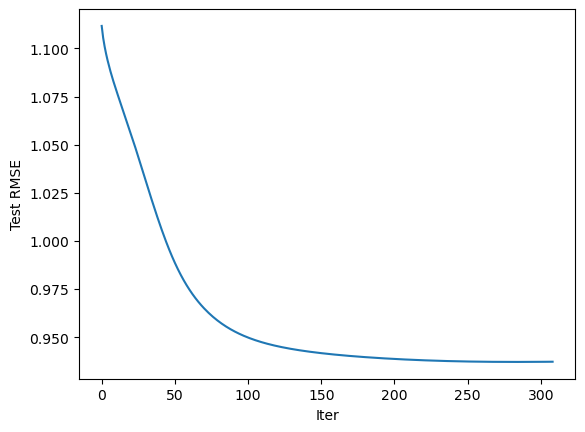

In [100]:
test_res = []
for p in result:
    test_res.append(p[2])
    
plt.plot(test_res)
plt.xlabel('Iter')
plt.ylabel('Test RMSE')
plt.show()